# Content and Objective

+ Show result of LS estimator for polynomials:
    + Given $(x_i, y_i), i=1,...,N$ 
    + Assume polynomial model (plus awgn) to be valid
    + Get LS estimate for polynomial coefficients and show result
    
+ Method: Sample groups and get estimator

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(30, 15) )

# Parameters

In [3]:
# define number of samples
N = 20

# define degrees of polynomials
K_actual = 8
K_est = 2

In [4]:
# randomly sample coefficients of polynomial and "noise-it"
coeffs = np.random.rand( K_actual ) * ( -1 )**np.random.randint( 2, size=K_actual )
coeffs /= np.linalg.norm( coeffs, 1 )
f = np.polynomial.polynomial.Polynomial( coeffs )

x_fine = np.linspace( 0, 1, 100)

In [5]:
# define variance of noise
sigma2 = .0

# define random measuring points
x_sample = np.sort( np.random.choice( x_fine, N, replace=False) )
f_sample = f( x_sample ) + np.sqrt( sigma2 ) * np.random.randn( x_sample.size )

# Do LS Estimation

In [6]:
X_LS = np.zeros( ( N, K_est ) )

for _n in range( N ):
    for _k in range( K_est ):
        X_LS[ _n, _k ] = ( x_sample[ _n ] )** _k
        
a_LS = np.matmul (np.linalg.pinv( X_LS ), f_sample )

In [7]:
f_LS = np.polynomial.polynomial.Polynomial( a_LS )


In [8]:
print( 'Actual coefficients:\n{}\n'.format( coeffs ) )

print( 'LS estimation:\n{}'.format( a_LS ) )

Actual coefficients:
[-0.21557597 -0.00335292  0.0824248  -0.25332259 -0.12604607 -0.04398149
  0.05214435 -0.22315181]

LS estimation:
[-2.15575965e-01 -3.35291657e-03  8.24247831e-02 -2.53322288e-01
 -1.26049042e-01 -4.39596176e-02  5.20248413e-02 -2.22671509e-01
 -1.34277344e-03  3.54003906e-03 -5.18798828e-03  5.29479980e-03
 -2.19726562e-03 -2.07519531e-03  3.38745117e-03 -1.83105469e-04
 -2.89916992e-03  1.70898438e-03  1.73187256e-03 -3.17382812e-03
  2.19726562e-03 -9.15527344e-04  1.14440918e-04]


# Plotting

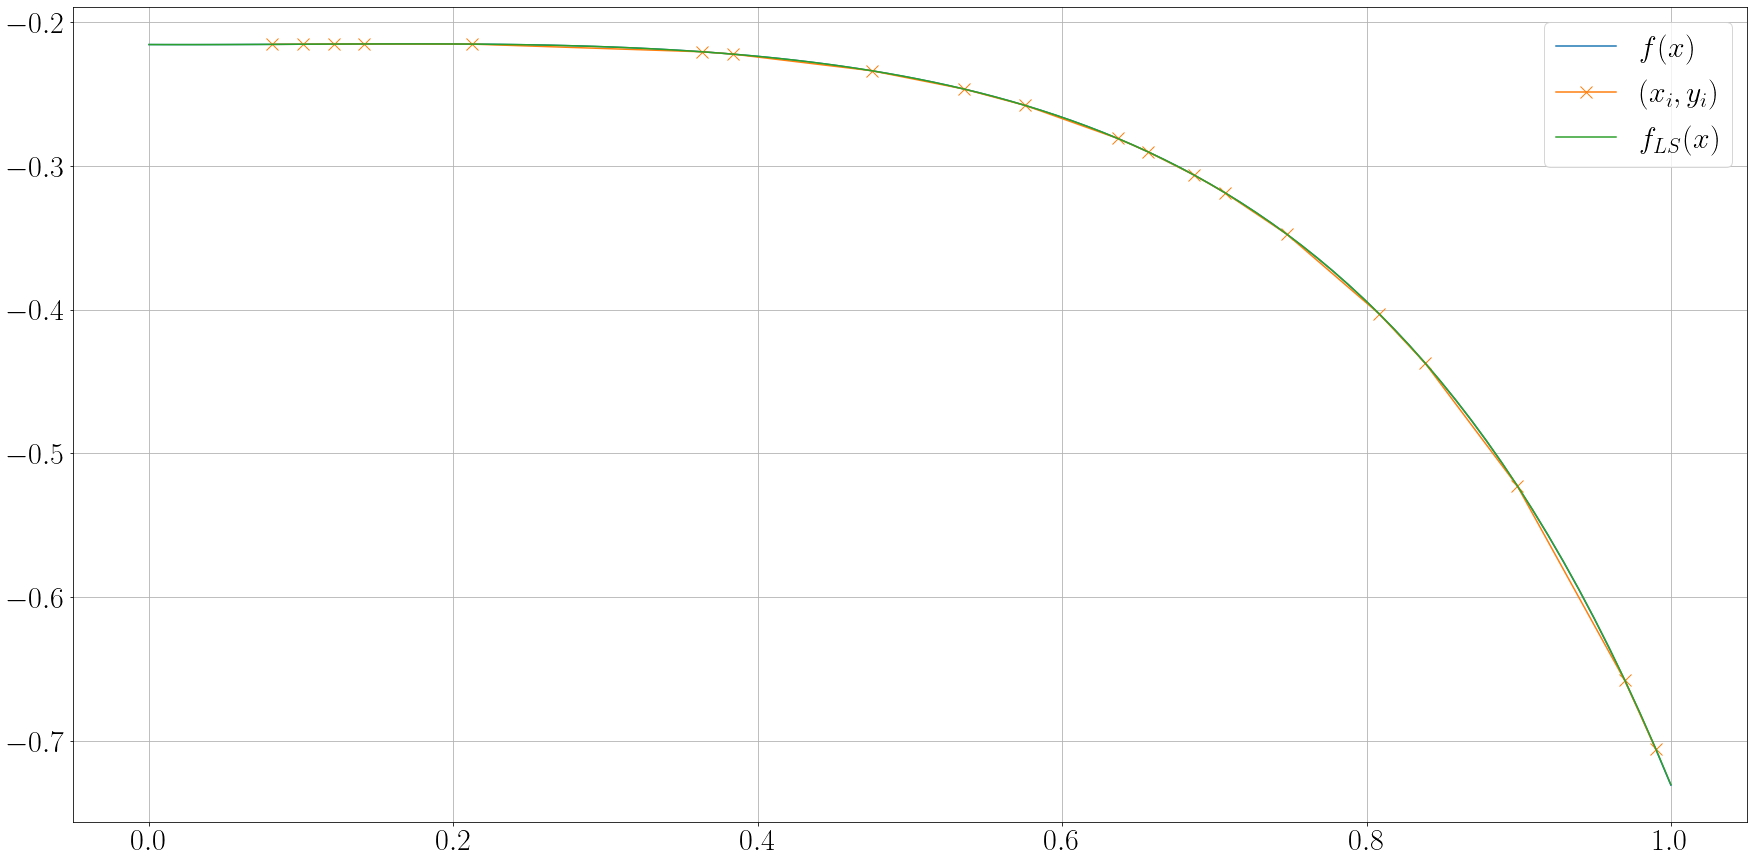

In [9]:
# plot results
plt.plot( x_fine, f( x_fine ), label='$f(x)$' )
plt.plot( x_sample, f_sample, '-x', ms=12, label='$(x_i, y_i)$' )


plt.plot( x_fine, f_LS( x_fine ), ms=12, label='$f_{LS}(x)$' )

plt.grid( True ) 
plt.legend()